In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
import random

# Number of data points
num_points = 20

# Generate random data points
data_points = {i + 1: (random.uniform(1, 10), random.uniform(1, 10)) for i in range(num_points)}

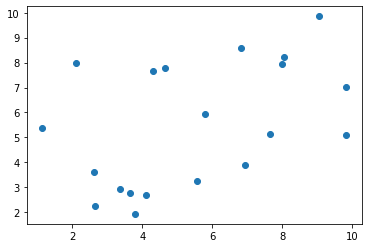

In [16]:
xs = [x for x,_ in data_points.values()]
ys = [y for _,y in data_points.values()]
plt.scatter(xs,ys)

In [4]:
data_points

{1: (6.12468345728524, 1.3724833171481414),
 2: (9.564627541512612, 3.0497222854129786),
 3: (2.5814046081706015, 3.1893849943871655),
 4: (6.08773120999437, 5.657850525410394),
 5: (5.227864685949567, 7.69287281285235),
 6: (4.8633422494713265, 5.9058541540224105),
 7: (8.927251109878833, 6.9868543083184464),
 8: (1.508493542561435, 4.7392697932230705),
 9: (5.521906241260434, 2.536661312594859),
 10: (5.20261381846674, 8.845662026091274),
 11: (4.537013254479405, 5.36661073953442),
 12: (7.167496818372745, 8.202542544275271),
 13: (8.99564730736213, 1.965200307349917),
 14: (1.0174627993506118, 4.9776375002333575),
 15: (4.4531117636879, 4.887597844213287),
 16: (7.117039442151308, 9.128819739328891),
 17: (2.8849493509274398, 1.3472784469675974),
 18: (9.493118108421957, 4.3206590632836),
 19: (3.10775518102912, 8.862433125415233),
 20: (4.213643523982807, 3.35851334726201)}

In [6]:
import math

def euclidean_distance(point1, point2):
    x1, y1 = point1
    x2, y2 = point2
    distance = math.sqrt((float(x2) - x1)**2 + (y2 - y1)**2)
    return round(distance,2)

def compute_centroid(pts):
    xs = [data_points[p][0] for p in pts]
    ys = [data_points[p][1] for p in pts]
    
    mean_x = float(sum(xs))/len(xs)
    mean_y = float(sum(ys))/len(ys)
    
    return (mean_x, mean_y)

In [7]:
def join(cluster: list, points):
    for p in points:
        if type(p) == int:
            cluster.append(p)
        else:
            cluster.extend(p)
    return cluster

In [ ]:
dictionary {key: value}

In [8]:
def compute_proximity_vals(data): # compute distance matrix in the form of a min-heap
    n = len(data.keys())
    clusters = list(data.keys()) # 1 2 3 4 5
    pq = []
    for i in range(n):
        for j in range(i+1, n):
            c1, c2 = clusters[i], clusters[j]
            p1 = data[c1] # (x,y) for c1
            p2 = data[c2] # (x,y) for c2
            heappush(pq, (euclidean_distance(p1,p2), [c1,c2]))
    return pq

In [13]:
from heapq import heappush, heappop

def get_clusters(data):
    # run one iteration of AGNES
    prox_vals = compute_proximity_vals(data)
    min_d, pts = heappop(prox_vals)
    print("min_d: {} pts: {}".format(min_d, pts))
    joined_cs = [p for p in pts] # list will tell me the points that are to be joined
    new_cluster = join([], pts)
#     print(prox_vals)
    if len(prox_vals) != 0:
        while min_d == prox_vals[0][0]:
            _, pts = heappop(prox_vals)
            new_cluster = join(new_cluster, pts)
            joined_cs.extend(pts)
    
    print("joined", joined_cs)
    cluster_center = compute_centroid(new_cluster)
    new_data = {k:v for k,v in data.items() if k not in joined_cs} # dictionary comprehension, list comprehension
    new_data[tuple(new_cluster)] = cluster_center 
    
    return new_data

In [17]:
clusters = []
current_clusters = {(k): v for k, v in data_points.items()}
clusters.append(current_clusters)
# print("clusters:\n", current_clusters)
while len(current_clusters.keys()) != 1:
    current_clusters = get_clusters(current_clusters)
    print("current_clusters:",list(current_clusters.keys()))
    
    clusters.append(current_clusters)

min_d: 0.27 pts: [12, 19]
joined [12, 19]
current_clusters: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 20, (12, 19)]
min_d: 0.35 pts: [5, 10]
joined [5, 10]
current_clusters: [1, 2, 3, 4, 6, 7, 8, 9, 11, 13, 14, 15, 16, 17, 18, 20, (12, 19), (5, 10)]
min_d: 0.37 pts: [1, 9]
joined [1, 9]
current_clusters: [2, 3, 4, 6, 7, 8, 11, 13, 14, 15, 16, 17, 18, 20, (12, 19), (5, 10), (1, 9)]
min_d: 0.62 pts: [4, (5, 10)]
joined [4, (5, 10)]
current_clusters: [2, 3, 6, 7, 8, 11, 13, 14, 15, 16, 17, 18, 20, (12, 19), (1, 9), (4, 5, 10)]
min_d: 0.86 pts: [15, (4, 5, 10)]
joined [15, (4, 5, 10)]
current_clusters: [2, 3, 6, 7, 8, 11, 13, 14, 16, 17, 18, 20, (12, 19), (1, 9), (15, 4, 5, 10)]
min_d: 1.14 pts: [17, (15, 4, 5, 10)]
joined [17, (15, 4, 5, 10)]
current_clusters: [2, 3, 6, 7, 8, 11, 13, 14, 16, 18, 20, (12, 19), (1, 9), (17, 15, 4, 5, 10)]
min_d: 1.29 pts: [13, (12, 19)]
joined [13, (12, 19)]
current_clusters: [2, 3, 6, 7, 8, 11, 14, 16, 18, 20, (1, 9), (17, 15, 4, 5, 10), 

In [18]:
clusters

[{1: (4.660449500110537, 7.787075585959132),
  2: (2.1164960197429945, 7.980203417813709),
  3: (1.139749909849811, 5.366523240249712),
  4: (4.108470046454089, 2.6826807345693897),
  5: (3.6568697102352425, 2.755976554194138),
  6: (9.033725711651732, 9.857667802496007),
  7: (9.823101337978432, 5.086379407876328),
  8: (5.551550291159997, 3.240825529792005),
  9: (4.303085750818649, 7.676235526629762),
  10: (3.355167110374203, 2.939894017062025),
  11: (7.646354688024172, 5.119240854504197),
  12: (8.05489589984278, 8.225748982433188),
  13: (6.817207774461273, 8.57319799201689),
  14: (5.786977969427802, 5.940708331465442),
  15: (3.783361787696358, 1.9329841766213738),
  16: (2.634339686381477, 3.619697335545589),
  17: (2.642735256163089, 2.2384813063633886),
  18: (9.828574882728969, 7.014221730875867),
  19: (7.9835580649055595, 7.961676133120466),
  20: (6.9362356389608, 3.89124974227713)},
 {1: (4.660449500110537, 7.787075585959132),
  2: (2.1164960197429945, 7.98020341781370